Epoch 100, Loss: 0.2406
Epoch 200, Loss: 0.1568
Epoch 300, Loss: 0.1221
Epoch 400, Loss: 0.0957
Epoch 500, Loss: 0.0755
Epoch 600, Loss: 0.0601
Epoch 700, Loss: 0.0483
Epoch 800, Loss: 0.0392
Epoch 900, Loss: 0.0323
Epoch 1000, Loss: 0.0271


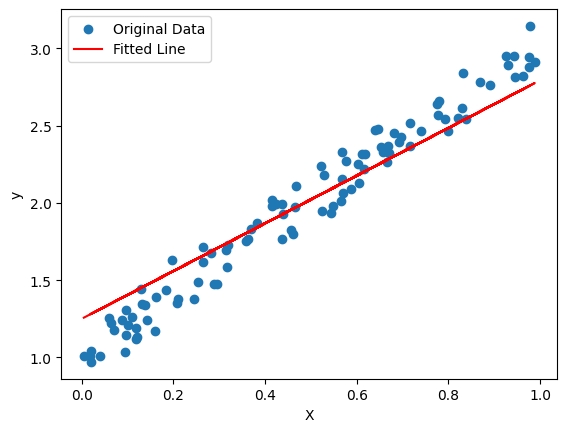

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 가상의 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# TensorFlow 그래프 생성 및 세션 시작
tf.compat.v1.disable_eager_execution()  # TensorFlow 2.x에서 1.x의 기능을 사용하기 위해

# 모델 구성
X_placeholder = tf.compat.v1.placeholder(tf.float32, shape=(None, 1), name="X")
y_placeholder = tf.compat.v1.placeholder(tf.float32, shape=(None, 1), name="y")

weights = tf.Variable(tf.random.normal(shape=[1, 1]), name="weights")
bias = tf.Variable(tf.zeros(shape=[1]), name="bias")

y_pred = tf.matmul(X_placeholder, weights) + bias

# 손실 함수 정의
loss = tf.reduce_mean(tf.square(y_pred - y_placeholder), name="loss")

# 옵티마이저 설정
learning_rate = 0.01
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# 훈련
num_epochs = 1000

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    for epoch in range(num_epochs):
        _, current_loss = sess.run([train_op, loss], feed_dict={X_placeholder: X, y_placeholder: y})
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {current_loss:.4f}")

    # 학습된 모델로 예측 수행
    y_pred_values = sess.run(y_pred, feed_dict={X_placeholder: X})

# 결과 시각화
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred_values, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


